## Data Preprocessing

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('SQLiV-3.csv',encoding='utf-8')
data.iloc[:,0:2].sample(10)

,Sentence,Label
5988,"select count ( * ) from all_users t1,all_...",1
20209,"SELECT TIME ( ""2017-08-15 19:30:10.000001"" ) ;",0
15780,ja34ico,0
25655,SELECT * FROM something WHERE characteristic B...,0
24311,SELECT Count ( * ) AS movement,0
4581,select count ( * ) from generate_series ...,1
24067,SELECT COUNT ( officer ) FROM suddenly,0
26963,SELECT how,0
25769,SELECT excitement ( s ) FROM lamp FULL OUTER ...,0
27831,SELECT apart ( s ) FROM plant LEFT JOIN,0


In [5]:
len(data)

30919

In [6]:
data = data.dropna(subset = ['Sentence','Label'])

In [7]:
data = data.reset_index()

In [8]:
len(data)

30649

In [9]:
data['Label'].unique()

array(['1', 'SELECT *', ' --', ' desc users', ' OR',
       "waitfor delay '0:0:__TIME__'--", ' drop table temp --', '0',
       ' grant resource to name', ' EXEC SelectAllCustomers',
       ' /*Select all the columns of all the records in the Customers table:*/',
       '*/', ' CREATE VIEW [Products Above Average Price] AS',
       ' CREATE OR REPLACE VIEW view_name AS', ' DROP TABLE Suppliers',
       ' CREATE PROCEDURE SelectAllCustomers AS',
       '  EXEC SelectAllCustomers',
       " DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'",
       ' CREATE OR REPLACE VIEW [Brazil Customers] AS',
       '  SELECT * FROM CustomersLIMIT 3', 'SELECT * FROM Customers',
       ' SELECT TOP 50 PERCENT * FROM Customers',
       ' SELECT * FROM CustomersFETCH FIRST 50 PERCENT ROWS ONLY',
       'SELECT TOP 3 * FROM Customers', ' SELECT * FROM Customers',
       'SELECT SUM ( Quantity ) ', ' SELECT column_name ( s ) ',
       ' SELECT City FROM Customers'], dtype=object)

In [10]:
Labels = [1 for x in range(len(data['Label']))]
for i in range(len(data['Label'])):
    try:
        Labels[i] = int(data['Label'][i])
    except:
        pass

In [11]:
X = data['Sentence']
y = Labels

In [12]:
corpus = []
for i in range(0, len(X)):
    print(i,end = '\r')
    query = str(X[i])
    query = query.lower()
    corpus.append(query)

## Model Creation

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
def create_model(embedding_vector_features, sent_length):
    model=Sequential()
    model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
    model.add(Dropout(0.5))
    model.add(LSTM(100,return_sequences = True))
    model.add(Dropout(0.5))
    model.add(LSTM(256))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

## Feature Extraction

In [15]:
voc_size = 20000
embedding_vector_features=64

In [16]:
onehot_repr=[one_hot(word,voc_size)for word in corpus]

In [17]:
sent_length=25
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  6814   307   695]
 [ 1742 11066 11647 ... 15698 16140  7131]
 [    0     0     0 ... 14733 12004  7541]
 ...
 [    0     0     0 ... 16209 10588  2933]
 [    0     0     0 ...  8316 10588  8869]
 [    0     0     0 ...  8895 10588 16692]]


In [16]:
len(embedded_docs)

30649

In [17]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [18]:
X_final.shape,y_final.shape

((30649, 25), (30649,))

## Spiltting data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

In [20]:
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
model = create_model(embedding_vector_features, sent_length)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 64)            1280000   
                                                                 
 dropout (Dropout)           (None, 25, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 25, 100)           66000     
                                                                 
 dropout_1 (Dropout)         (None, 25, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               365568    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

## Training

In [23]:
model_history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=1000)

Epoch 1/10
19/19 [==============================] - 31s 153ms/step - loss: 0.5681 - accuracy: 0.7014 - val_loss: 0.3842 - val_accuracy: 0.8536
Epoch 2/10
19/19 [==============================] - 1s 62ms/step - loss: 0.2243 - accuracy: 0.9131 - val_loss: 0.0906 - val_accuracy: 0.9793
Epoch 3/10
19/19 [==============================] - 1s 61ms/step - loss: 0.0657 - accuracy: 0.9828 - val_loss: 0.0554 - val_accuracy: 0.9856
Epoch 4/10
19/19 [==============================] - 1s 60ms/step - loss: 0.0420 - accuracy: 0.9897 - val_loss: 0.0434 - val_accuracy: 0.9891
Epoch 5/10
19/19 [==============================] - 1s 60ms/step - loss: 0.0340 - accuracy: 0.9920 - val_loss: 0.0392 - val_accuracy: 0.9909
Epoch 6/10
19/19 [==============================] - 1s 60ms/step - loss: 0.0322 - accuracy: 0.9928 - val_loss: 0.0417 - val_accuracy: 0.9920
Epoch 7/10
19/19 [==============================] - 1s 60ms/step - loss: 0.0278 - accuracy: 0.9935 - val_loss: 0.0418 - val_accuracy: 0.9915
Epoch 8/10


## Performance Testing

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [27]:
y_pred=model.predict(X_test)

240/240 [==============================] - 2s 7ms/step


### ACCURACY and LOSS curve

In [28]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


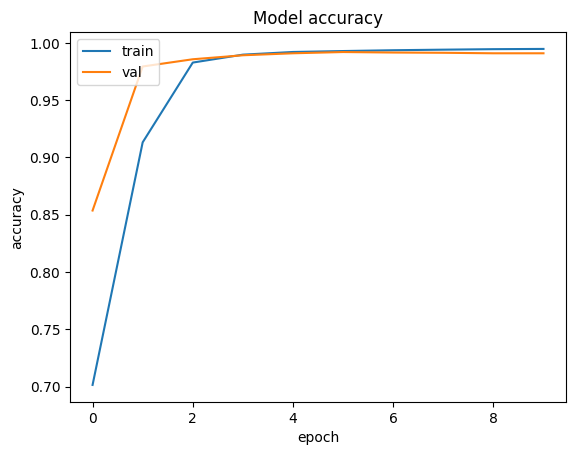

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

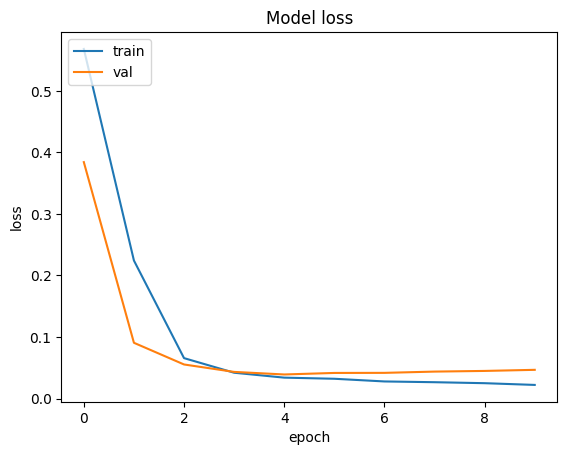

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

### ROC Curve

In [31]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

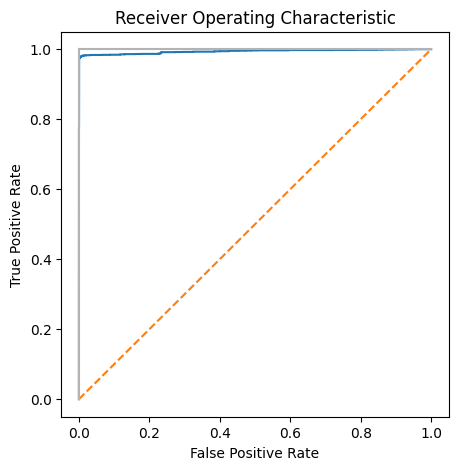

In [32]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

roc_auc_score:  0.9936989503775084


### Predicting Values

In [34]:
y_ = [1 if x>0.9 else 0 for x in y_pred]

### Confusion Matrix

In [35]:
cm = confusion_matrix(y_test,y_)
cm

array([[4805,    3],
       [  86, 2769]], dtype=int64)

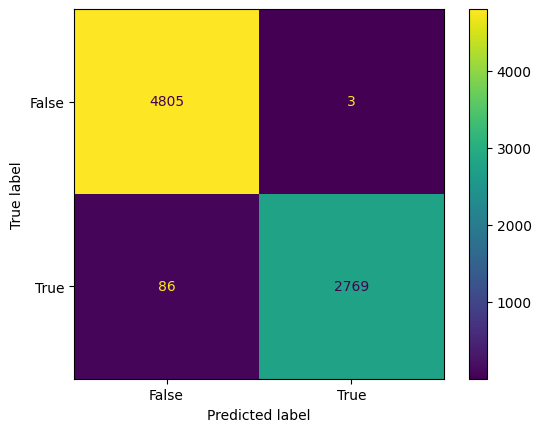

In [36]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [37]:
accuracy_score(y_test,y_)

0.9883857497063813

## Saving Model

In [38]:
model.save('final_model.h5')

## Manual Testing

### Load Model

In [79]:
import keras
loaded_model = keras.models.load_model('final_model.h5')

In [80]:
def prediction(test,inp_model):
    test_one_hot = one_hot(test,20000)
    l = len(test_one_hot)
    if l<25:
        pad = 25 - l
        a = [0 for x in range(pad)]
        a.extend(test_one_hot)
        test = np.array(a)
        test = test.reshape(-1,25)
    else:
        test_one_hot = test_one_hot[:25]
        test = np.array(test_one_hot)
        test = test.reshape(-1,25)
        
    ans = inp_model.predict(test)
    if ans>0.9:
        print('SQL Injection Detected')
    else:
        print('Safe Inputs')

In [81]:
x = input('Enter String: ')
x = prediction(x,loaded_model)

Enter String:  ' OR '1' = '1'--


1/1 [==============================] - 1s 714ms/step
SQL Injection Detected


In [281]:
"' OR '1' = '1'--"
"Select * From Table"
"Gaurav Garg"

'Gaurav Garg'